## 01c_HSC_preprocessing_overlap

evaluate enriched genes in each cluster and determine if there exists similarity between clusters.  

**Conclusion:** G-CSF clusters mainly match the ones from indo and ct, pol(I:C) and dmPGE2 no clear 1:1 match.   


used this docker image:

docker run --rm -d --name test_eva -p 8883:8888 -e JUPYTER_ENABLE_LAB=YES -v /Users/efast/Documents/:/home/jovyan/work gseapy

In [1]:
#load some packages that are needed for plotting + computation

import math
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import gseapy as gp
%matplotlib inline

from gprofiler import GProfiler
from helper_functions import *


## Cluster overlap

###  ct vs indo

In [2]:
sample = 'indo'

LT = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + sample + '.csv')
MPP = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + 'ct' + '.csv')

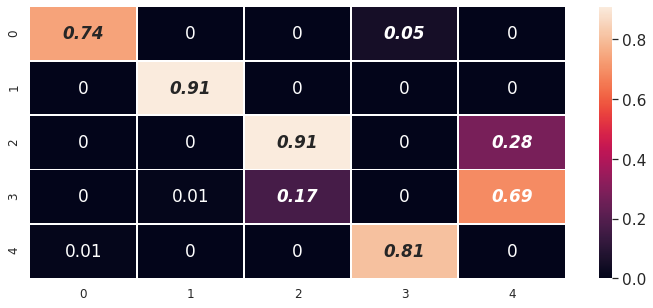

In [3]:
total_n = len(LT)

MPP_cls = ['0', '1', '2', '3', '4']
LT_cls = ['0', '1', '2', '3', '4']

results_df_list =[]
results_df = pd.DataFrame()

p_value_df_list = []
p_value_df = pd.DataFrame()

for MPP_cl in MPP_cls:
    results_df_list =[]
    p_value_df_list =[]
    MPP_column_pvalue = MPP_cl + '_p'
    MPP_column_fch = MPP_cl + '_l'
    MPP_column_name = MPP_cl + '_n'
    MPP_sort_column = MPP_cl + '_s'
    
    list1 = MPP.sort_values(by=MPP_sort_column, ascending=False)[MPP_column_name][:100].tolist()
     
    for LT_cl in LT_cls:
        LT_column_pvalue = LT_cl + '_p'
        LT_column_fch = LT_cl + '_l'
        LT_column_name = LT_cl + '_n'
        LT_sort_column = LT_cl + '_s'
        
        list2 = LT.sort_values(by=LT_sort_column, ascending=False)[LT_column_name][:100].tolist()
        
        intersection = len(list(set(list1).intersection(list2)))
        only_MPP = len(list1) - intersection
        only_LT = len(list2) - intersection
        rest = total_n - (only_MPP + only_LT + intersection)
       
        oddsratio, pvalue = stats.fisher_exact([[intersection, only_MPP], [only_LT, rest]])
        
        results_df_list.append(intersection)
        p_value_df_list.append(pvalue)
    
    p_value_df_series = pd.Series(p_value_df_list)
    p_value_df = p_value_df.append(p_value_df_series, ignore_index=True)
    
    results_df_list = pd.Series(results_df_list)
    results_df = results_df.append(results_df_list, ignore_index=True)

p_value_df, rej = multiple_testing_correction(ps = p_value_df, 
                                                    alpha=0.01,
                                                    method='benjamini-hochberg')
p_value_df = pd.DataFrame(p_value_df) 

p_value_mask_sig = p_value_df > 0.01
p_value_mask_nonsig = p_value_df < 0.01

sns.set(font_scale=1.4)

plt.figure(figsize=(12,5))
#sns.heatmap(results_df, annot=True, annot_kws={"size": 16}, mask = p_value_mask)
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation=-0, fontsize = 12)


sns.heatmap(results_df/100,
            mask = p_value_mask_sig,
            linewidth=0.5,
            annot_kws={"style": "italic", "weight": "bold"},
            annot=True)


sns.heatmap(results_df/100,
            mask = p_value_mask_nonsig,
            linewidth=0.5,
            cbar=False,
            annot=True)


###  ct vs GCSF

In [4]:
sample = 'GCSF'

LT = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + sample + '.csv')
MPP = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + 'ct' + '.csv')

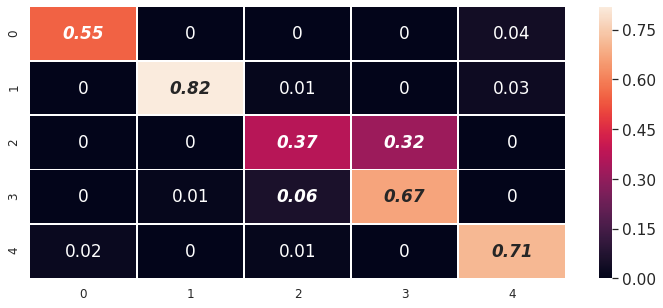

In [5]:
total_n = len(LT)

MPP_cls = ['0', '1', '2', '3', '4']
LT_cls = ['0', '1', '2', '3', '4']

results_df_list =[]
results_df = pd.DataFrame()

p_value_df_list = []
p_value_df = pd.DataFrame()

for MPP_cl in MPP_cls:
    results_df_list =[]
    p_value_df_list =[]
    MPP_column_pvalue = MPP_cl + '_p'
    MPP_column_fch = MPP_cl + '_l'
    MPP_column_name = MPP_cl + '_n'
    MPP_sort_column = MPP_cl + '_s'
    
    list1 = MPP.sort_values(by=MPP_sort_column, ascending=False)[MPP_column_name][:100].tolist()
     
    for LT_cl in LT_cls:
        LT_column_pvalue = LT_cl + '_p'
        LT_column_fch = LT_cl + '_l'
        LT_column_name = LT_cl + '_n'
        LT_sort_column = LT_cl + '_s'
        
        list2 = LT.sort_values(by=LT_sort_column, ascending=False)[LT_column_name][:100].tolist()
        
        intersection = len(list(set(list1).intersection(list2)))
        only_MPP = len(list1) - intersection
        only_LT = len(list2) - intersection
        rest = total_n - (only_MPP + only_LT + intersection)
       
        oddsratio, pvalue = stats.fisher_exact([[intersection, only_MPP], [only_LT, rest]])
        
        results_df_list.append(intersection)
        p_value_df_list.append(pvalue)
    
    p_value_df_series = pd.Series(p_value_df_list)
    p_value_df = p_value_df.append(p_value_df_series, ignore_index=True)
    
    results_df_list = pd.Series(results_df_list)
    results_df = results_df.append(results_df_list, ignore_index=True)

p_value_df, rej = multiple_testing_correction(ps = p_value_df, 
                                                    alpha=0.01,
                                                    method='benjamini-hochberg')
p_value_df = pd.DataFrame(p_value_df) 

p_value_mask_sig = p_value_df > 0.01
p_value_mask_nonsig = p_value_df < 0.01

sns.set(font_scale=1.4)

plt.figure(figsize=(12,5))
#sns.heatmap(results_df, annot=True, annot_kws={"size": 16}, mask = p_value_mask)
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation=-0, fontsize = 12)


sns.heatmap(results_df/100,
            mask = p_value_mask_sig,
            linewidth=0.5,
            annot_kws={"style": "italic", "weight": "bold"},
            annot=True)


sns.heatmap(results_df/100,
            mask = p_value_mask_nonsig,
            linewidth=0.5,
            cbar=False,
            annot=True)


###  ct vs pIC

In [6]:
sample = 'pIC'

LT = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + sample + '.csv')
MPP = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + 'ct' + '.csv')

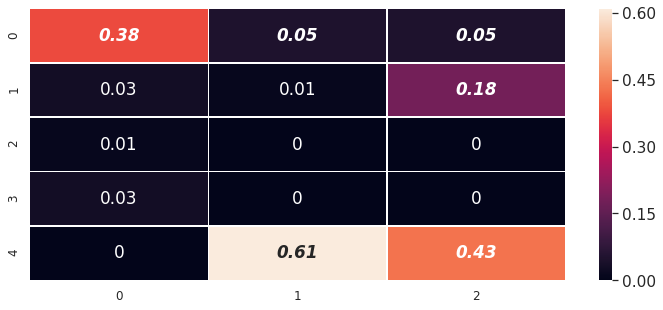

In [7]:
total_n = len(LT)

MPP_cls = ['0', '1', '2', '3', '4']
LT_cls = ['0', '1', '2']

results_df_list =[]
results_df = pd.DataFrame()

p_value_df_list = []
p_value_df = pd.DataFrame()

for MPP_cl in MPP_cls:
    results_df_list =[]
    p_value_df_list =[]
    MPP_column_pvalue = MPP_cl + '_p'
    MPP_column_fch = MPP_cl + '_l'
    MPP_column_name = MPP_cl + '_n'
    MPP_sort_column = MPP_cl + '_s'
    
    list1 = MPP.sort_values(by=MPP_sort_column, ascending=False)[MPP_column_name][:100].tolist()
     
    for LT_cl in LT_cls:
        LT_column_pvalue = LT_cl + '_p'
        LT_column_fch = LT_cl + '_l'
        LT_column_name = LT_cl + '_n'
        LT_sort_column = LT_cl + '_s'
        
        list2 = LT.sort_values(by=LT_sort_column, ascending=False)[LT_column_name][:100].tolist()
        
        intersection = len(list(set(list1).intersection(list2)))
        only_MPP = len(list1) - intersection
        only_LT = len(list2) - intersection
        rest = total_n - (only_MPP + only_LT + intersection)
       
        oddsratio, pvalue = stats.fisher_exact([[intersection, only_MPP], [only_LT, rest]])
        
        results_df_list.append(intersection)
        p_value_df_list.append(pvalue)
    
    p_value_df_series = pd.Series(p_value_df_list)
    p_value_df = p_value_df.append(p_value_df_series, ignore_index=True)
    
    results_df_list = pd.Series(results_df_list)
    results_df = results_df.append(results_df_list, ignore_index=True)

p_value_df, rej = multiple_testing_correction(ps = p_value_df, 
                                                    alpha=0.01,
                                                    method='benjamini-hochberg')
p_value_df = pd.DataFrame(p_value_df) 

p_value_mask_sig = p_value_df > 0.01
p_value_mask_nonsig = p_value_df < 0.01

sns.set(font_scale=1.4)

plt.figure(figsize=(12,5))
#sns.heatmap(results_df, annot=True, annot_kws={"size": 16}, mask = p_value_mask)
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation=-0, fontsize = 12)


sns.heatmap(results_df/100,
            mask = p_value_mask_sig,
            linewidth=0.5,
            annot_kws={"style": "italic", "weight": "bold"},
            annot=True)


sns.heatmap(results_df/100,
            mask = p_value_mask_nonsig,
            linewidth=0.5,
            cbar=False,
            annot=True)

###  ct vs dmPGE2

In [8]:
sample = 'dmPGE2'

LT = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + sample + '.csv')
MPP = pd.read_csv('/home/jovyan/work/Z_TRASH/write/clusters_' + 'ct' + '.csv')

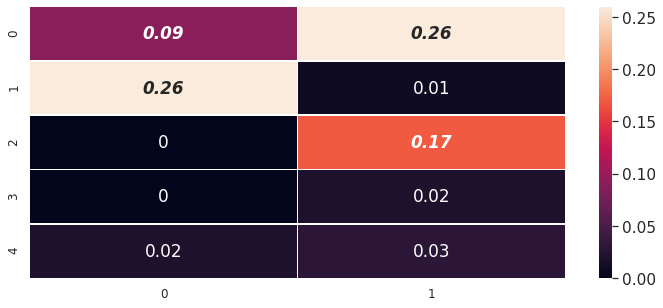

In [9]:
total_n = len(LT)

MPP_cls = ['0', '1', '2', '3', '4']
LT_cls = ['0', '1']

results_df_list =[]
results_df = pd.DataFrame()

p_value_df_list = []
p_value_df = pd.DataFrame()

for MPP_cl in MPP_cls:
    results_df_list =[]
    p_value_df_list =[]
    MPP_column_pvalue = MPP_cl + '_p'
    MPP_column_fch = MPP_cl + '_l'
    MPP_column_name = MPP_cl + '_n'
    MPP_sort_column = MPP_cl + '_s'
    
    list1 = MPP.sort_values(by=MPP_sort_column, ascending=False)[MPP_column_name][:100].tolist()
     
    for LT_cl in LT_cls:
        LT_column_pvalue = LT_cl + '_p'
        LT_column_fch = LT_cl + '_l'
        LT_column_name = LT_cl + '_n'
        LT_sort_column = LT_cl + '_s'
        
        list2 = LT.sort_values(by=LT_sort_column, ascending=False)[LT_column_name][:100].tolist()
        
        intersection = len(list(set(list1).intersection(list2)))
        only_MPP = len(list1) - intersection
        only_LT = len(list2) - intersection
        rest = total_n - (only_MPP + only_LT + intersection)
       
        oddsratio, pvalue = stats.fisher_exact([[intersection, only_MPP], [only_LT, rest]])
        
        results_df_list.append(intersection)
        p_value_df_list.append(pvalue)
    
    p_value_df_series = pd.Series(p_value_df_list)
    p_value_df = p_value_df.append(p_value_df_series, ignore_index=True)
    
    results_df_list = pd.Series(results_df_list)
    results_df = results_df.append(results_df_list, ignore_index=True)

p_value_df, rej = multiple_testing_correction(ps = p_value_df, 
                                                    alpha=0.01,
                                                    method='benjamini-hochberg')
p_value_df = pd.DataFrame(p_value_df) 

p_value_mask_sig = p_value_df > 0.01
p_value_mask_nonsig = p_value_df < 0.01

sns.set(font_scale=1.4)

plt.figure(figsize=(12,5))
#sns.heatmap(results_df, annot=True, annot_kws={"size": 16}, mask = p_value_mask)
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation=-0, fontsize = 12)


sns.heatmap(results_df/100,
            mask = p_value_mask_sig,
            linewidth=0.5,
            annot_kws={"style": "italic", "weight": "bold"},
            annot=True)


sns.heatmap(results_df/100,
            mask = p_value_mask_nonsig,
            linewidth=0.5,
            cbar=False,
            annot=True)